# Windy Gridworld SARSA

## Example Description
![windy_gridworld](../images/lecture_2/windy_gridworld.png)

## SARSA Algorithm
![sarsa](../images/lecture_2/sarsa.png)

## Import Env

In [82]:
import numpy as np
from envs import WindyGridworldEnv
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict
from typing import Dict,List,Tuple
env=WindyGridworldEnv()

In [83]:
env.action_space.n

4

In [84]:
env.observation_space

Discrete(70)

## Epsilon-greedy Decision

In [85]:
def epsilon_greedy(q:Dict[int,np.ndarray],state:int,num_actions:int,epsilon:float):
    probability=np.ones(num_actions)*epsilon/num_actions
    idx_action_with_max_q=np.argmax(q[state])
    probability[idx_action_with_max_q]=1-np.sum(probability[1:])
    return np.random.choice(np.arange(num_actions),p=probability)
epsilon_greedy(defaultdict(lambda:np.zeros(env.action_space.n)),0,env.action_space.n,0.1)

0

## SARSA

In [86]:
def sarsa(env:gym.Env,num_episodes:int,gamma=0.9,alpha=0.1,epsilon=0.1):
    """
        gamma: discount factor
        alpha: the updating rate of q
        epsilon: the epsilon-greedy parameter
    """
    q=defaultdict(lambda:np.zeros(env.action_space.n))
    td_num_attempt_per_episode=defaultdict(int)
    td_reward_per_episode=defaultdict(float)
    for episode_i in range(num_episodes):
        is_terminated=False
        state=env.reset()
        action=epsilon_greedy(q,state,env.action_space.n,epsilon)
        while not is_terminated:
            next_state,reward,is_terminated,info=env.step(action)
            next_action=epsilon_greedy(q,next_state,env.action_space.n,epsilon)
            q[state][action]+=alpha*(reward+gamma*q[next_state][next_action]-q[state][action])
            
            state=next_state
            action=next_action
            
            td_num_attempt_per_episode[episode_i]+=1
            td_reward_per_episode[episode_i]+=reward
    
    return q,td_num_attempt_per_episode,td_reward_per_episode

q,td_num_attempt_per_episode,td_reward_per_episode=sarsa(env,int(1e3))
            

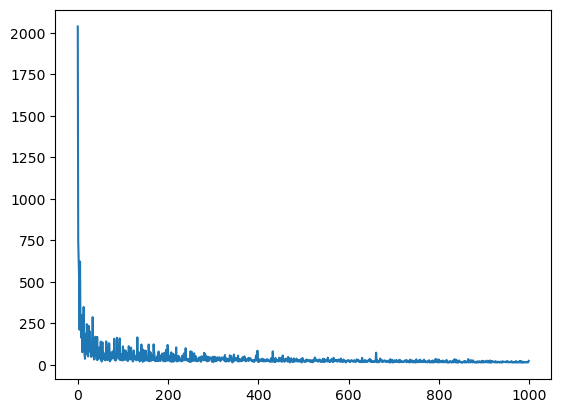

In [87]:
def plot_attempt_per_episode(td_num_attempt_per_episode:Dict):
    fig,ax=plt.subplots()
    ax.plot([k for k in td_num_attempt_per_episode.keys()],[v for v in td_num_attempt_per_episode.values()])
plot_attempt_per_episode(td_num_attempt_per_episode)

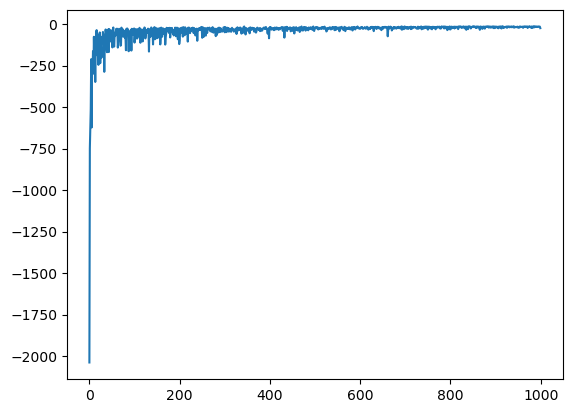

In [88]:
def plot_reward_per_episode(td_reward_per_episode):
    fig,ax=plt.subplots()
    ax.plot([k for k in td_reward_per_episode.keys()],[v for v in td_reward_per_episode.values()])
plot_reward_per_episode(td_reward_per_episode)


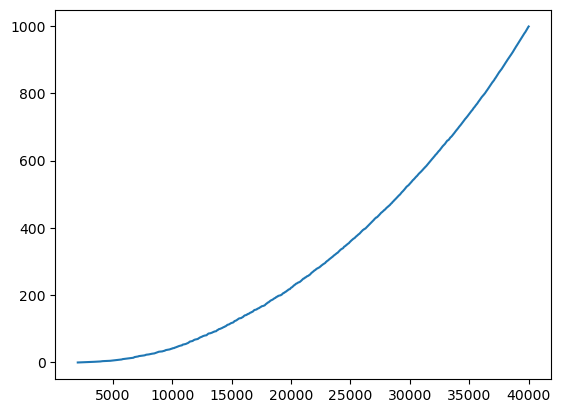

In [89]:
def plot_trend(td_num_attempt_per_episode):
    fig,ax=plt.subplots()
    ax.plot(np.cumsum([v for v in td_num_attempt_per_episode.values()]),np.arange(len(td_num_attempt_per_episode)))
plot_trend(td_num_attempt_per_episode)